In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pd.pandas.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv(r'C:\Users\abhiv\Desktop\DS\Data Science Projects\Advance House price predection\Raw Data\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.shape

(1460, 81)

# Checking Null values

In [7]:
null_features = [features for features in df.columns if df[features].isnull().sum() > 0]

for features in null_features:
    print(features, ':' , np.round(df[features].isnull().sum()/df.shape[0]*100, 4))
    #print(features, ':' , df[features].isnull().mean()*100)

LotFrontage : 17.7397
Alley : 93.7671
MasVnrType : 0.5479
MasVnrArea : 0.5479
BsmtQual : 2.5342
BsmtCond : 2.5342
BsmtExposure : 2.6027
BsmtFinType1 : 2.5342
BsmtFinType2 : 2.6027
Electrical : 0.0685
FireplaceQu : 47.2603
GarageType : 5.5479
GarageYrBlt : 5.5479
GarageFinish : 5.5479
GarageQual : 5.5479
GarageCond : 5.5479
PoolQC : 99.5205
Fence : 80.7534
MiscFeature : 96.3014


# Dropping features which have more that 80% null values

In [8]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [9]:
null_features = [features for features in df.columns if df[features].isnull().sum() > 0]

# Checking the relationship of remaning null valiable with target variable

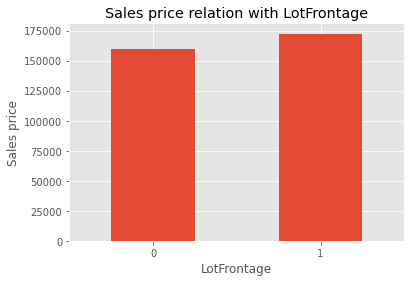

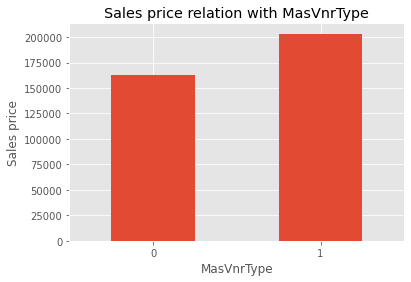

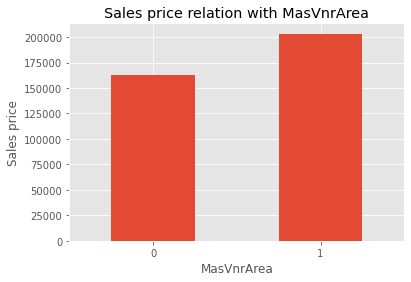

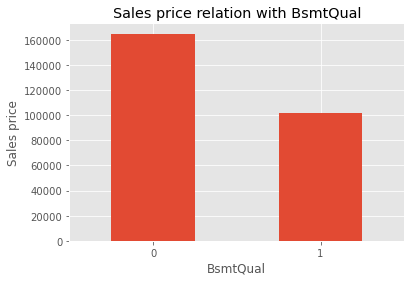

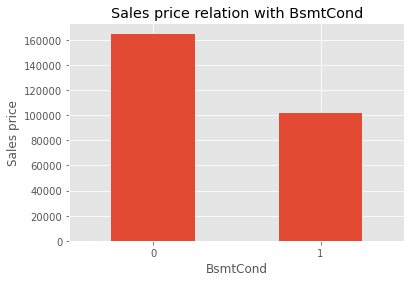

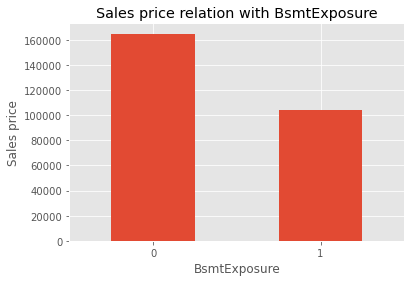

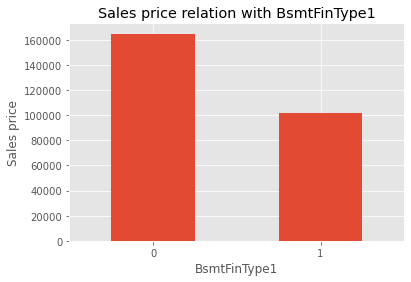

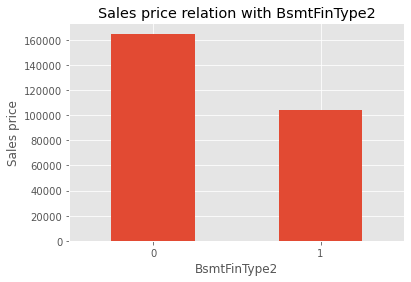

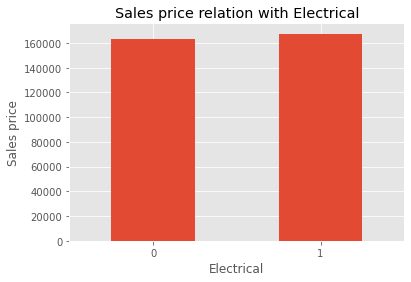

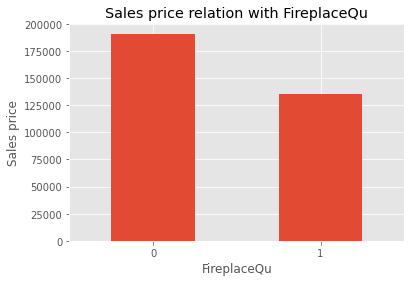

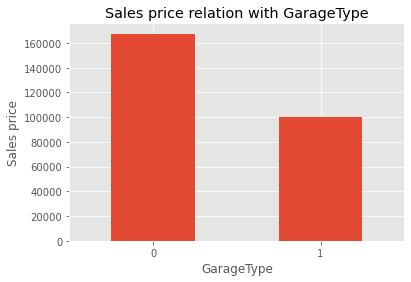

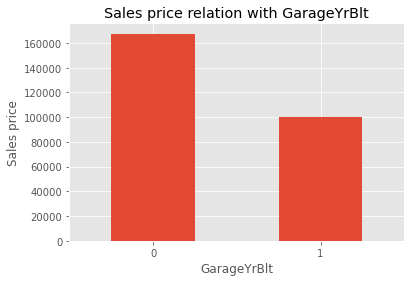

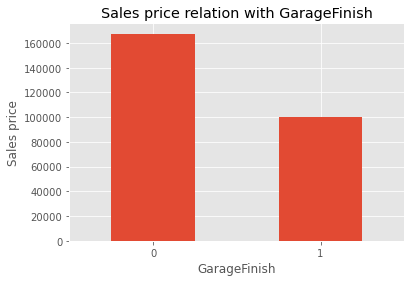

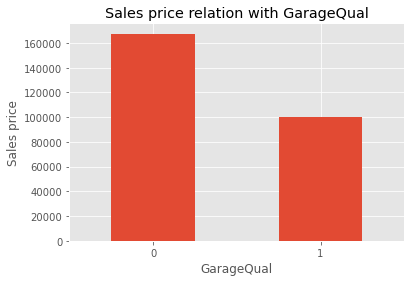

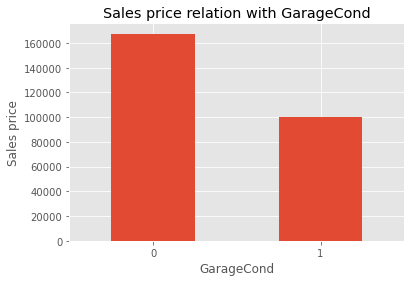

In [10]:
#df['aa'] = np.where(df['LotFrontage'].isnull(), 1,0)
#df.groupby('aa')['SalePrice'].median().plot.bar()
plt.style.use('ggplot')
for features in null_features:
    data = df.copy()
    
    data[features] = np.where(data[features].isnull(), 1, 0)
    data.groupby(features)['SalePrice'].median().plot(kind = 'bar')
    plt.ylabel('Sales price')
    plt.title('Sales price relation with ' + features)
    plt.xticks(rotation = 360)
    plt.show()

# Numerical Features

In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Lenght of numerial features is', len(numerical_features))
df[numerical_features].head()

Lenght of numerial features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Temporal Variables(Eg: Datetime Variables)

In [12]:
temporal_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
df[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


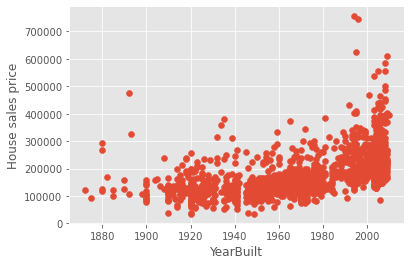

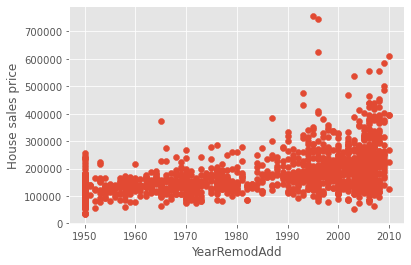

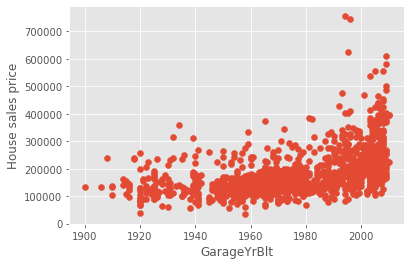

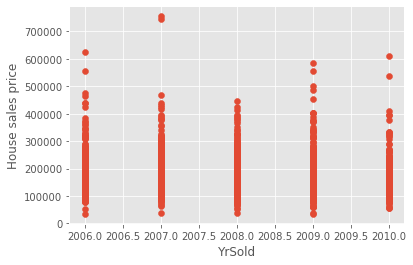

In [13]:
for feature in temporal_features:
    dataset = df.copy()
    plt.scatter(dataset[feature], df['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('House sales price')
    plt.show()
    print('\n')

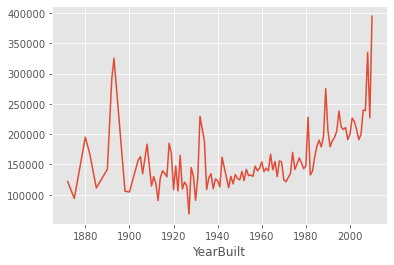

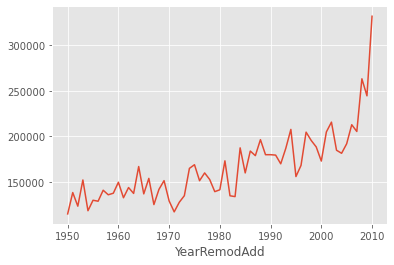

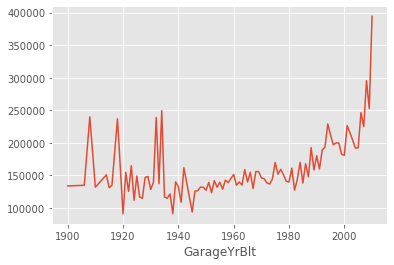

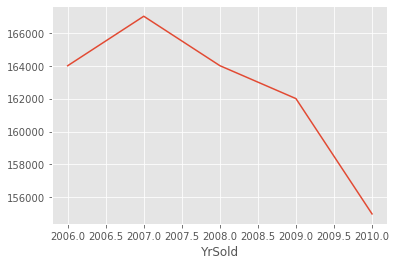

In [14]:
for feature in temporal_features:
    dataset = df.copy()
    dataset.groupby(feature)['SalePrice'].median().plot()
    plt.show()

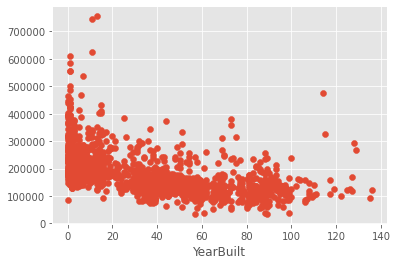

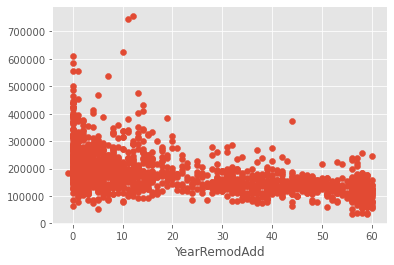

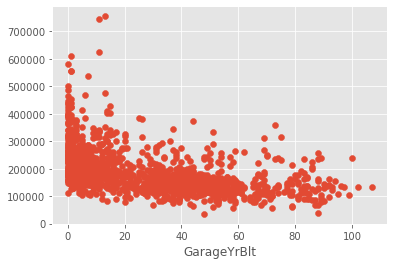

In [15]:
for feature in temporal_features:
    if feature != 'YrSold':
        dataset = df.copy()
        dataset[feature] = dataset['YrSold'] - dataset[feature]
        plt.scatter(dataset[feature], df['SalePrice'])
        plt.xlabel(feature)
        plt.show()

# Back to Numerical features except year related features

There are two types of categorical variable.
1. Discrete Variable
2. Continuous variable

In [16]:
discrete_data_feature = [feature for feature in numerical_features if df[feature].nunique() < 25 
                         and feature not in temporal_features + ['Id'] ]

print('Total features with discrete data are:', len(discrete_data_feature))

Total features with discrete data are: 17


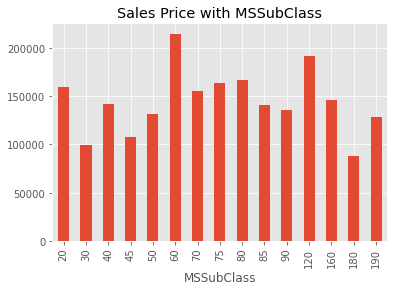

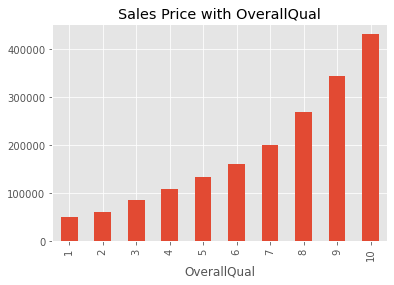

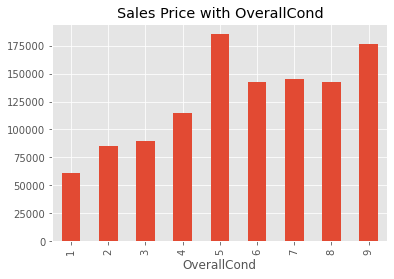

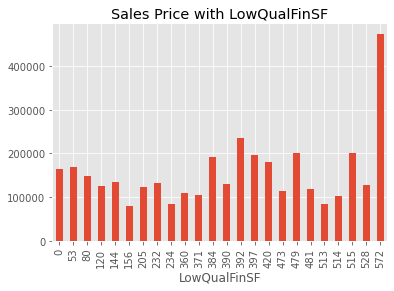

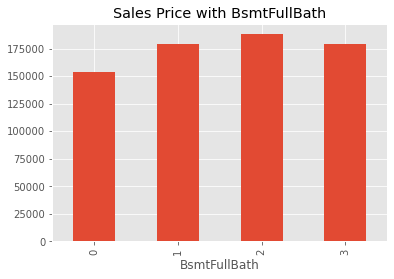

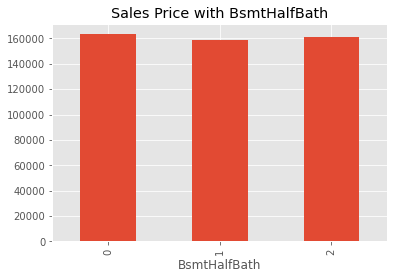

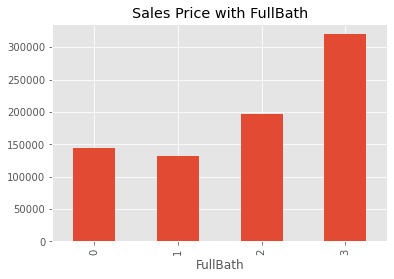

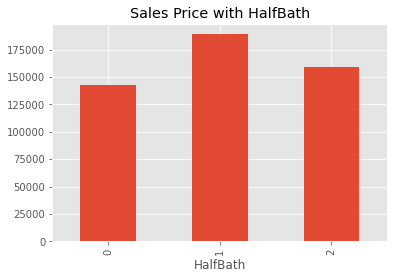

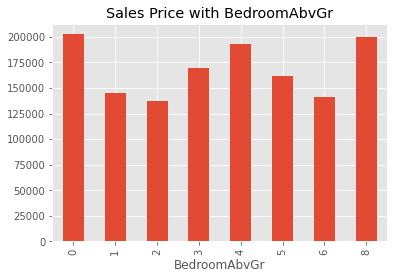

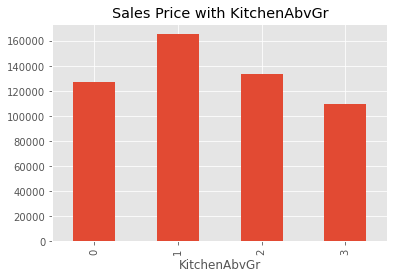

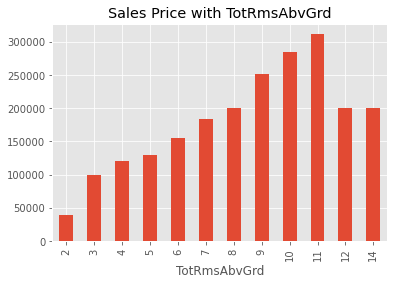

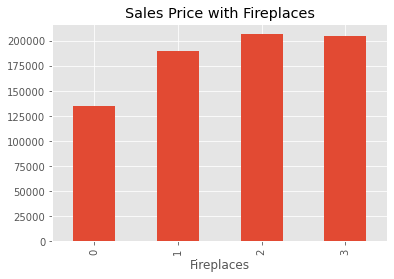

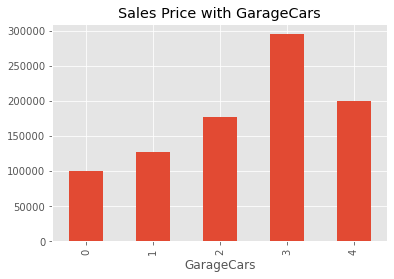

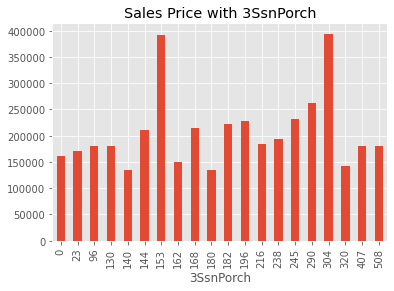

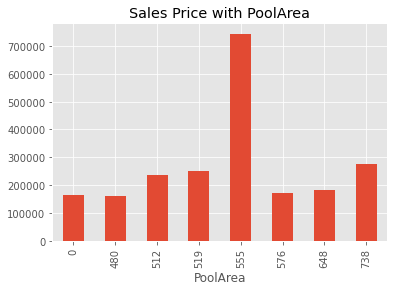

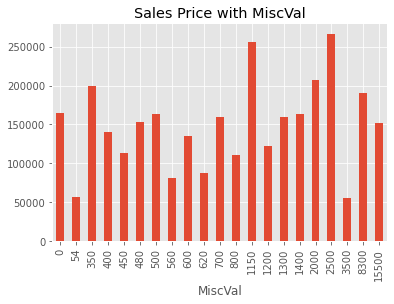

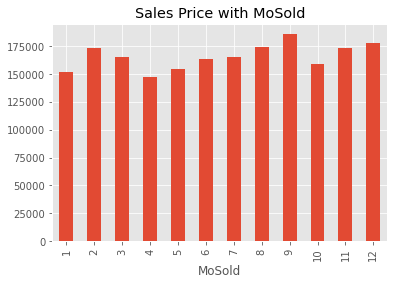

In [17]:
for feature in discrete_data_feature:
    dataset = df.copy()
    dataset.groupby(feature)['SalePrice'].median().plot(kind = 'bar')
    plt.xlabel(feature)
    plt.title('Sales Price with {}'.format(feature))
    plt.show()

In [18]:
df['PoolArea'].value_counts()/df.shape[0]

0      0.995205
512    0.000685
648    0.000685
576    0.000685
555    0.000685
480    0.000685
519    0.000685
738    0.000685
Name: PoolArea, dtype: float64

Here we can say that, More than 99 % customers prefers to buy a house which does not have any pool

In [19]:
df[df['PoolArea']==555]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000


In [20]:
df[(df['SalePrice']>=745000) & (df['SalePrice']<=755000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


C:\Users\abhiv\anaconda3\envs\housepredection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

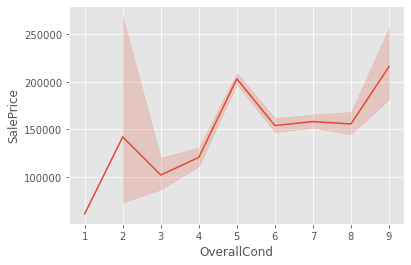

In [21]:
print(df['OverallCond'].value_counts())
sns.lineplot(df['OverallCond'], df['SalePrice'])

Overall condition-

10 - Very Excellent

5 -	Average

7 -	Good

6 -	Above Average

1 -	Very Poor

As we can see that most of the house sold has 5-7 overall condition, here we can make a conclusion that people are not interested in buying houses which are in poor/ excellent condition.

# Continuous Variable

In [22]:
continuous_data_feature = [feature for feature in numerical_features if 
                           feature not in discrete_data_feature + temporal_features + ['Id'] ]
print('Total features with continous data are:', len(continuous_data_feature))

Total features with continous data are: 16


# The below code will help us to identify the skewness and distribution of the data

Skewness of LotFrontage is: 2.163569142324884


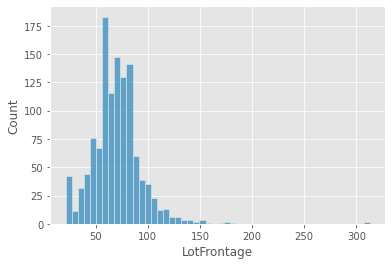

Skewness of LotArea is: 12.207687851233496


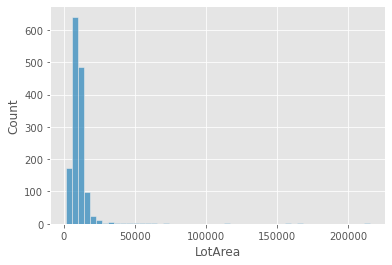

Skewness of MasVnrArea is: 2.669084210182863


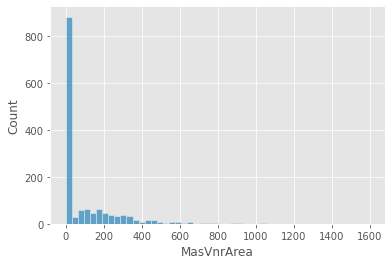

Skewness of BsmtFinSF1 is: 1.685503071910789


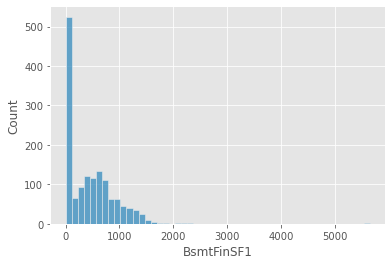

Skewness of BsmtFinSF2 is: 4.255261108933303


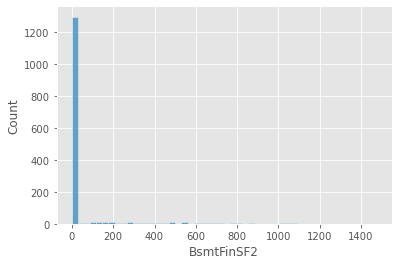

Skewness of BsmtUnfSF is: 0.9202684528039037


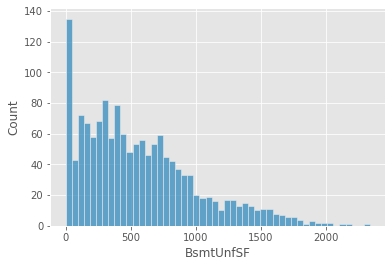

Skewness of TotalBsmtSF is: 1.5242545490627664


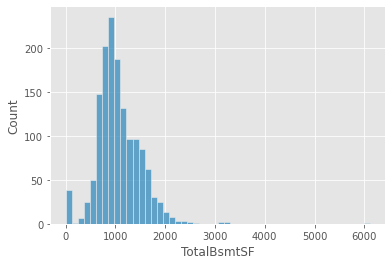

Skewness of 1stFlrSF is: 1.3767566220336365


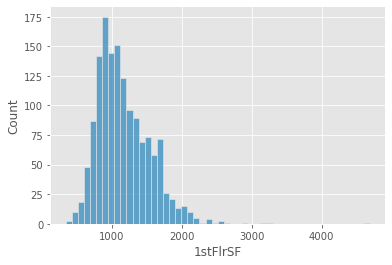

Skewness of 2ndFlrSF is: 0.8130298163023265


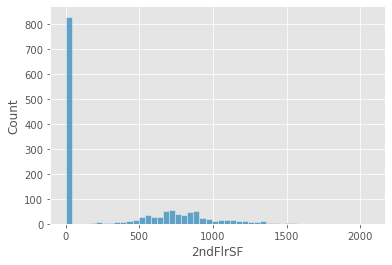

Skewness of GrLivArea is: 1.3665603560164552


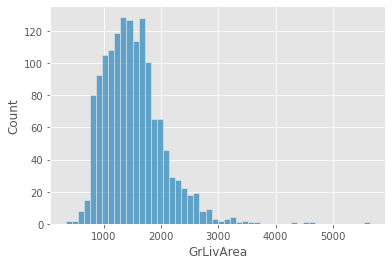

Skewness of GarageArea is: 0.17998090674623907


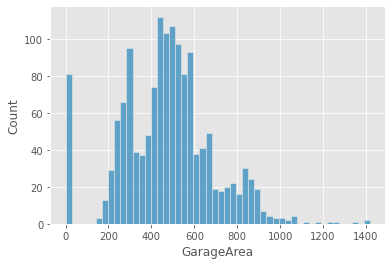

Skewness of WoodDeckSF is: 1.5413757571931312


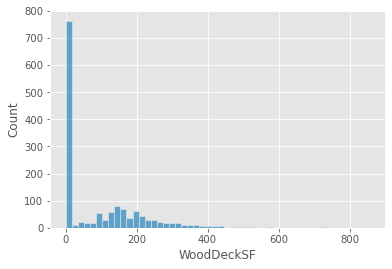

Skewness of OpenPorchSF is: 2.3643417403694404


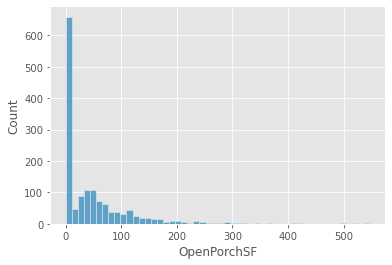

Skewness of EnclosedPorch is: 3.08987190371177


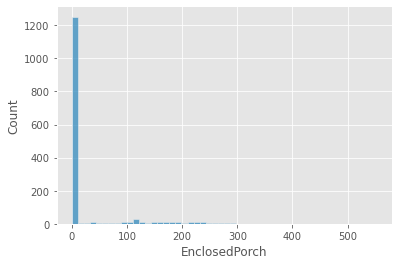

Skewness of ScreenPorch is: 4.122213743143115


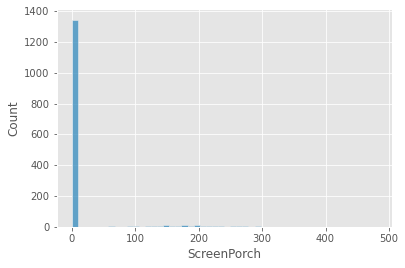

Skewness of SalePrice is: 1.8828757597682129


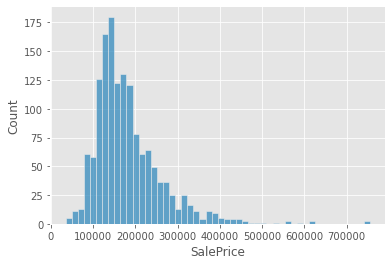

In [23]:
for feature in continuous_data_feature:
    dataset = df.copy()
    print('Skewness of {} is: {}'.format(feature, dataset[feature].skew()))
    sns.histplot(dataset[feature], bins=50)
    plt.xlabel(feature)
    plt.show()

Here we can clearly identy that we have only right(positive) skewed features, so we will deal with the skewness in feature engineering part

In [24]:
Skewed_features = [feature for feature in continuous_data_feature if df[feature].skew()>0.5]
print(Skewed_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


C:\Users\abhiv\anaconda3\envs\housepredection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


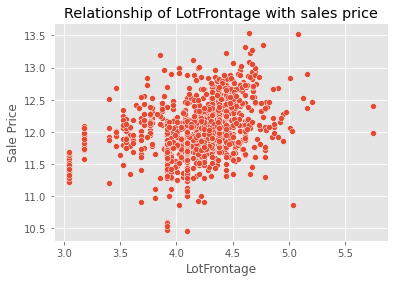

C:\Users\abhiv\anaconda3\envs\housepredection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


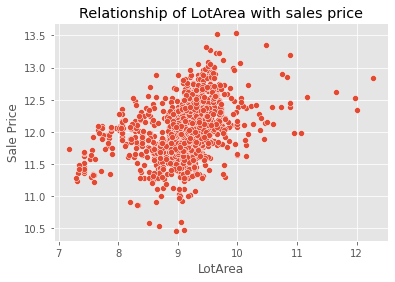

C:\Users\abhiv\anaconda3\envs\housepredection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


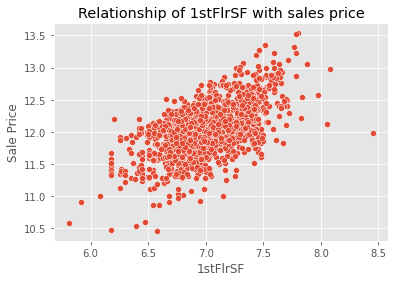

C:\Users\abhiv\anaconda3\envs\housepredection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


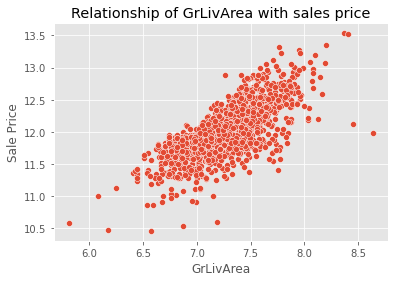

C:\Users\abhiv\anaconda3\envs\housepredection\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


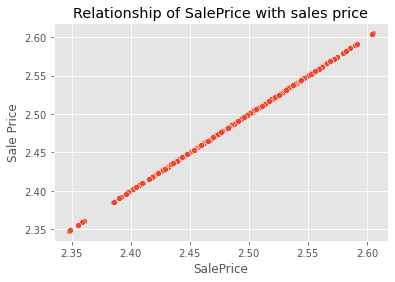

In [25]:
for feature in continuous_data_feature:
    dataset = df.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        sns.scatterplot(dataset[feature], dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title('Relationship of {} with sales price'.format(feature))
        plt.show()

# Outliers

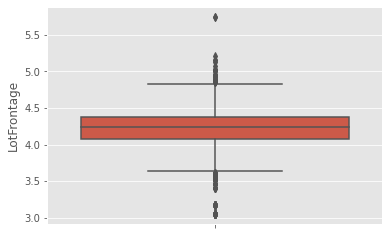

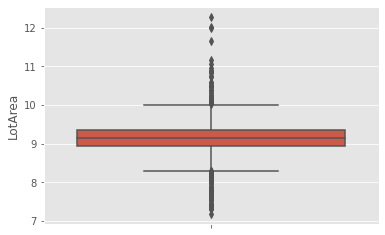

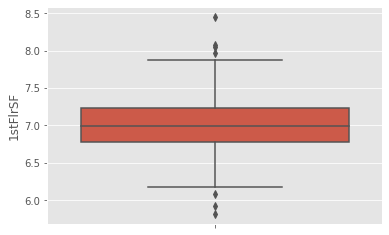

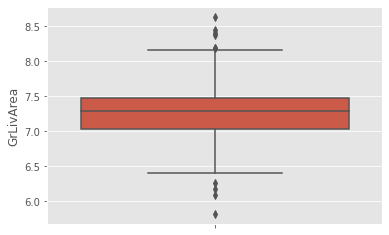

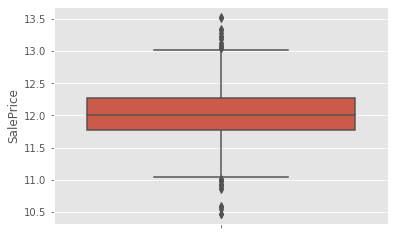

In [26]:
for feature in continuous_data_feature:
    dataset = df.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        #dataset.boxplot(feature)
        sns.boxplot(y = feature, data = dataset)
        
        plt.show()

Even after applying log transformation, our data has outliers, so we will remove them in feature engineering part

# Categorical Features

In [27]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Total categorical features are {}'.format(len(categorical_features)))

Total categorical features are 39


In [28]:
df[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [29]:
for feature in categorical_features:
    print('Total categories in {} are : {}'.format(feature,df[feature].nunique()))

Total categories in MSZoning are : 5
Total categories in Street are : 2
Total categories in LotShape are : 4
Total categories in LandContour are : 4
Total categories in Utilities are : 2
Total categories in LotConfig are : 5
Total categories in LandSlope are : 3
Total categories in Neighborhood are : 25
Total categories in Condition1 are : 9
Total categories in Condition2 are : 8
Total categories in BldgType are : 5
Total categories in HouseStyle are : 8
Total categories in RoofStyle are : 6
Total categories in RoofMatl are : 8
Total categories in Exterior1st are : 15
Total categories in Exterior2nd are : 16
Total categories in MasVnrType are : 4
Total categories in ExterQual are : 4
Total categories in ExterCond are : 5
Total categories in Foundation are : 6
Total categories in BsmtQual are : 4
Total categories in BsmtCond are : 4
Total categories in BsmtExposure are : 4
Total categories in BsmtFinType1 are : 6
Total categories in BsmtFinType2 are : 6
Total categories in Heating are :

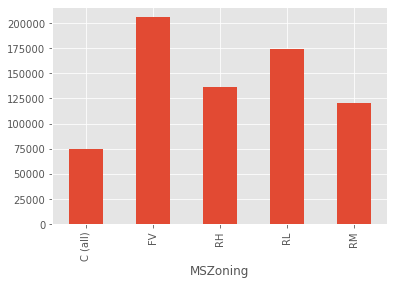

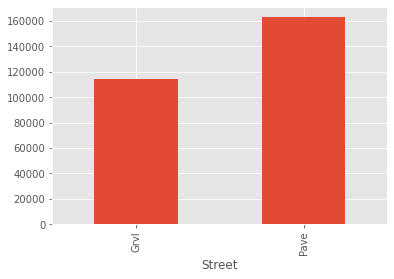

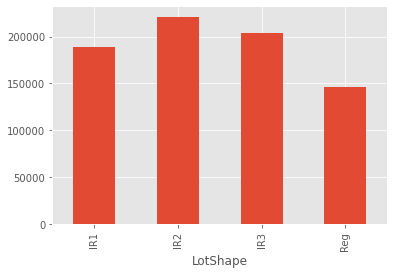

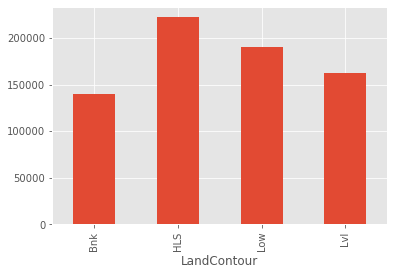

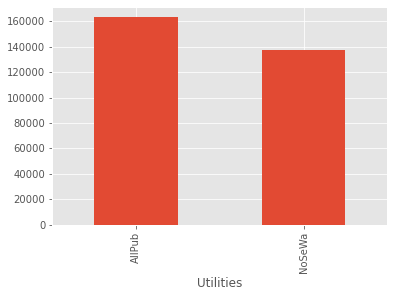

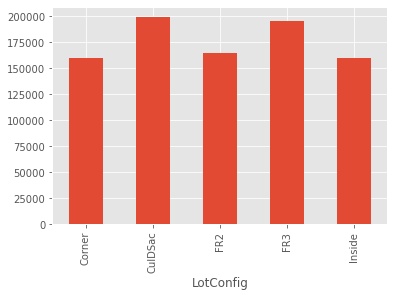

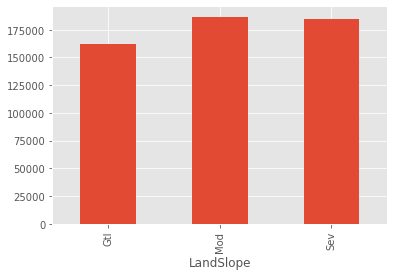

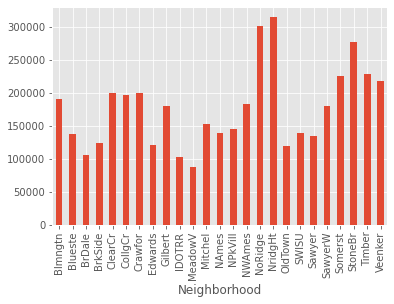

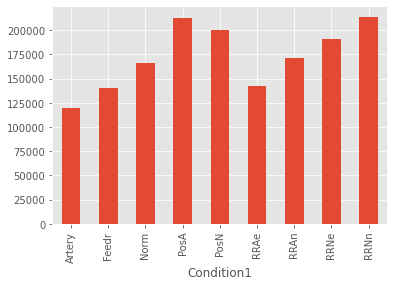

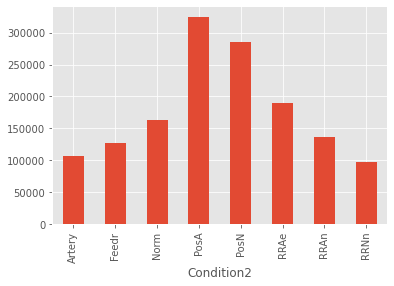

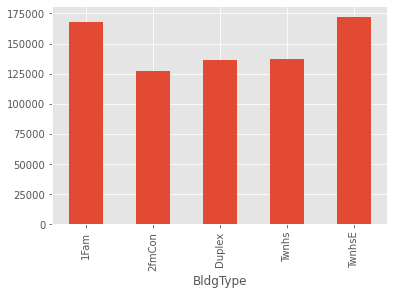

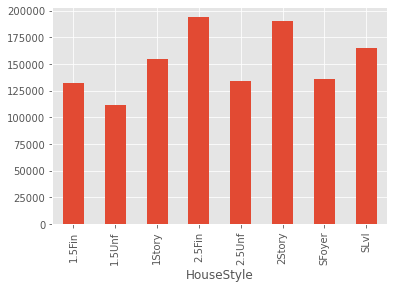

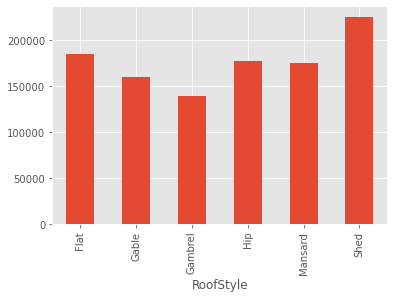

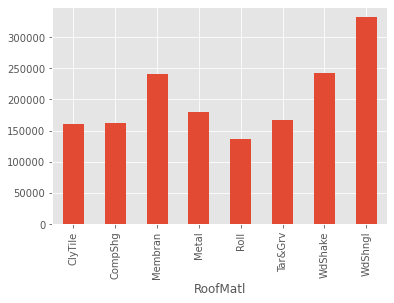

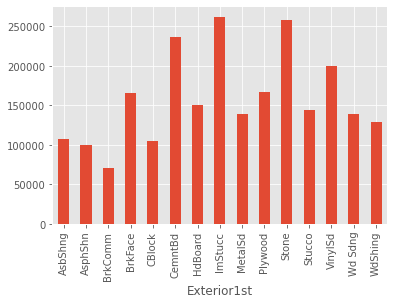

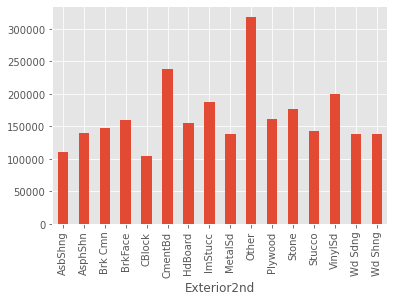

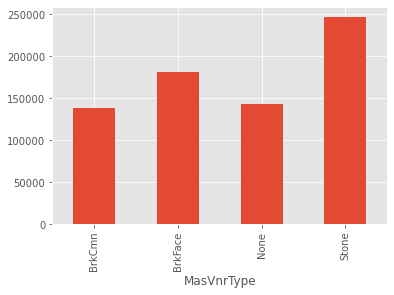

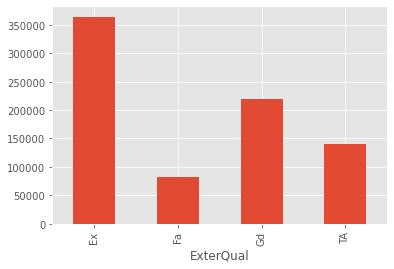

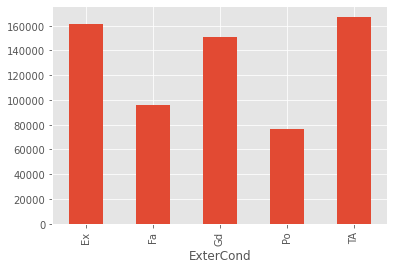

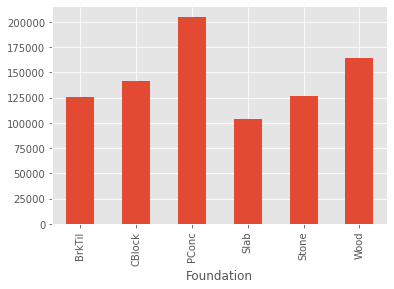

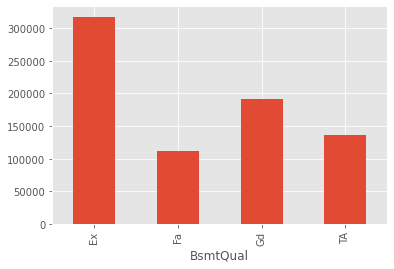

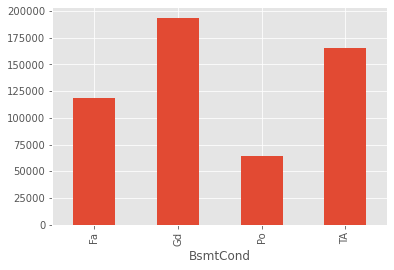

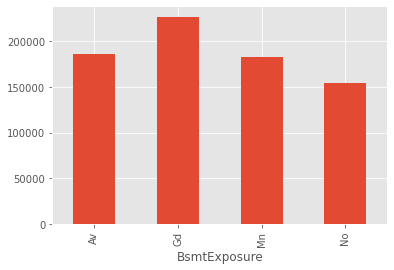

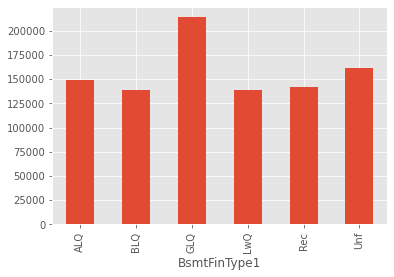

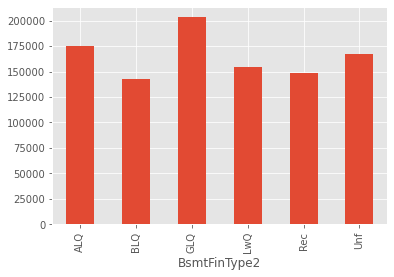

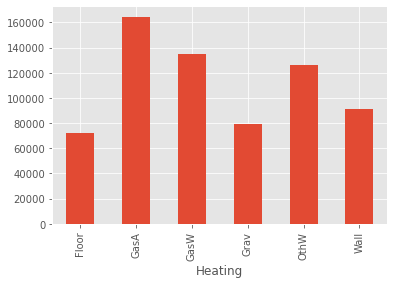

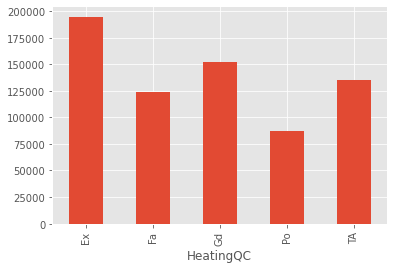

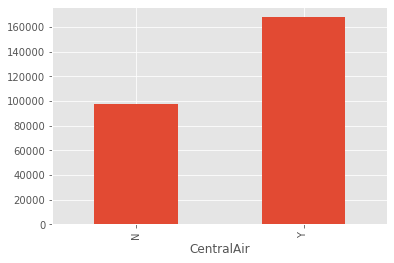

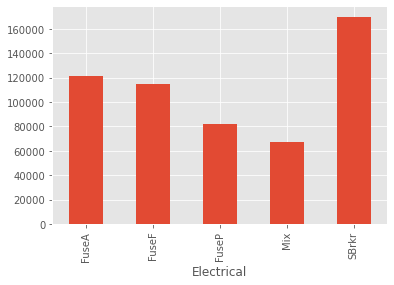

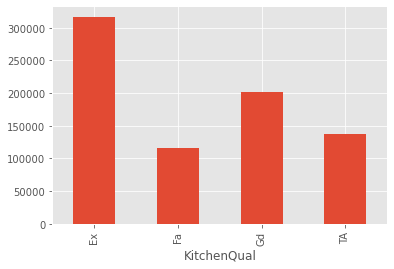

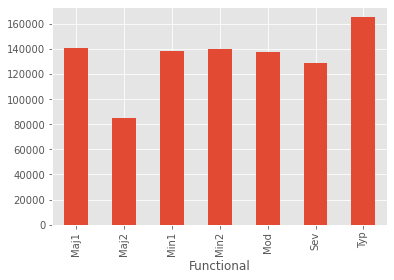

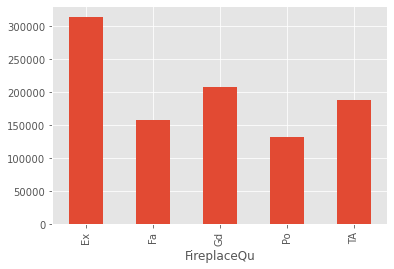

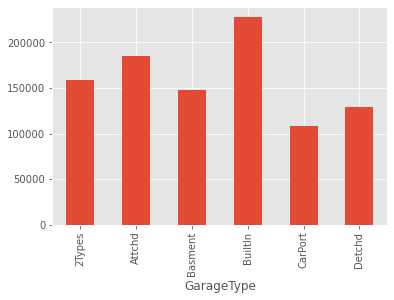

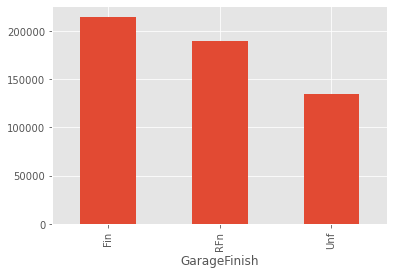

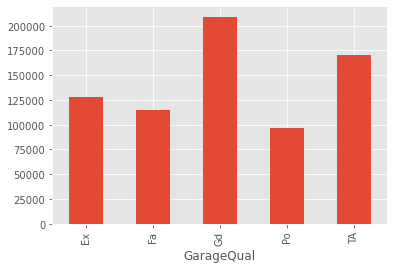

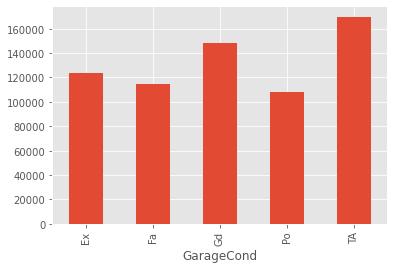

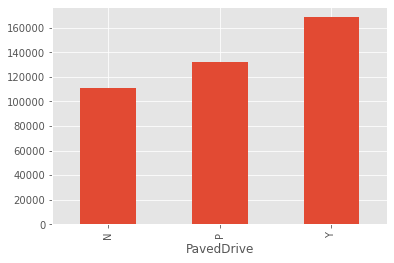

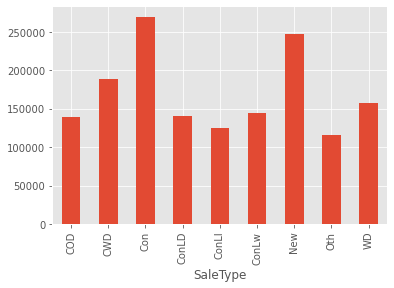

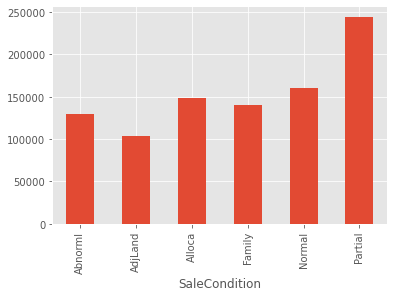

In [30]:
for feature in categorical_features:
    dataset = df.copy()
    dataset.groupby(feature)['SalePrice'].median().plot(kind = 'bar')
    plt.show()

<AxesSubplot:>

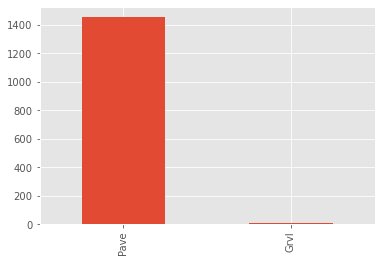

In [31]:
df['Street'].value_counts().plot(kind ='bar')

# Feature Engineering

# Missing value imputation for categorical features

In [32]:
df_FE = df.copy()

In [33]:
cat_features_na = [feature for feature in df_FE.columns if df_FE[feature].dtypes == 'O' and df_FE[feature].isnull().sum()>0]
for feature in cat_features_na:
    print('Null value percentage in {} is: {}%\n'.format(feature, np.round(df_FE[feature].isnull().mean()*100, 4)))
print('Total features with null values are: {}'.format(len(cat_features_na)))    

Null value percentage in MasVnrType is: 0.5479%

Null value percentage in BsmtQual is: 2.5342%

Null value percentage in BsmtCond is: 2.5342%

Null value percentage in BsmtExposure is: 2.6027%

Null value percentage in BsmtFinType1 is: 2.5342%

Null value percentage in BsmtFinType2 is: 2.6027%

Null value percentage in Electrical is: 0.0685%

Null value percentage in FireplaceQu is: 47.2603%

Null value percentage in GarageType is: 5.5479%

Null value percentage in GarageFinish is: 5.5479%

Null value percentage in GarageQual is: 5.5479%

Null value percentage in GarageCond is: 5.5479%

Total features with null values are: 12


FireplaceQu feature has 47% NA values, but as per the data discription - 

NA	mean No Fireplace

Fireplaces: Number of fireplaces

Lets figure it out

In [34]:
df_FE[df_FE['FireplaceQu'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,0,7,2007,WD,Normal,132000


In [35]:
df_FE['Fireplaces'].unique()

array([0, 1, 2, 3], dtype=int64)

In [36]:
df_FE[['Fireplaces', 'FireplaceQu']][df_FE['Fireplaces']==0].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


 We can clearly see that 'Fireplaces', 'FireplaceQu' both are corelated to each other, if Fireplaces has 0 then FireplaceQu would be taken as NaN. So we will compute this null value with No Fireplace 

In [ ]:
df_FE['FireplaceQu'].fillna('No Fireplace', inplace = True)

In [38]:
df_FE['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Ston
Most of the house does not have Masonry veneer type, so we will be replaceing null with None

In [39]:
df_FE['MasVnrType'].fillna('None', inplace = True)

# Exploring 'bsmt' related feature

In [40]:
bsmt = [feature for feature in df_FE.columns if 'Bsmt' in feature]

In [41]:
df_FE[bsmt][df_FE['BsmtQual'].isna()].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

if 'BsmtQual' has any NaN value, it means that perticula house does not have any basement, so that is why all the basemet related feature has NaN or 0 value       

We will replace NaN with 'No Basement' in all bsmt related categorical features

In [42]:
bsmt_cat = [feature for feature in bsmt if df_FE[feature].dtypes == 'O']
bsmt_cat

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [43]:
#for feature in bsmt_cat:
    #df[feature] = df[feature].fillna('No Basement')

def fill_na(data, feature, value):
    dataset = data.copy()
    dataset[feature] = dataset[feature].fillna(value)
    return dataset

df_new = fill_na(df_FE, bsmt_cat, 'No Basement')

# Remaining features with null values

In [44]:
for feature in cat_features_na:
    if df_new[feature].isna().sum() >0:
        print('Null value percentage in {} is: {}%\n'.format(feature, np.round(df_new[feature].isnull().mean()*100, 4))) 

Null value percentage in Electrical is: 0.0685%

Null value percentage in GarageType is: 5.5479%

Null value percentage in GarageFinish is: 5.5479%

Null value percentage in GarageQual is: 5.5479%

Null value percentage in GarageCond is: 5.5479%



In [45]:
df_new[df_new['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No Fireplace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


As this feature has only one null value, so will either drop it or fill with with mode

In [46]:
df_new['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [47]:
#df_new['Electrical'].dropna()
df_new['Electrical'].fillna('SBrkr', inplace = True)

# Exploring 'Garage' related feature

In [48]:
df_new[df_new['GarageType'].isna()].head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,No Basement,No Basement,No Basement,No Basement,0,No Basement,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,No Fireplace,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
127,128,45,RM,55.0,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000
140,141,20,RL,70.0,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000


Those house which does not have any Garage, have NaN and 0 in Garage retaed feature, so we will fill those null values with No Garage

In [49]:
garage_cat = [feature for feature in df_new.columns if 'Garage' in feature and df_new[feature].dtypes == 'O']
garage_cat

['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [50]:
df_cat = fill_na(df_new, garage_cat, 'No Garage')

In [51]:
df_cat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Missing value imputation for numerical features

In [52]:
num_features_na = [feature for feature in df_cat.columns if df_cat[feature].dtypes != 'O' and df_cat[feature].isnull().sum()>0]
for feature in num_features_na:
    print('Null value percentage in {} is: {}%\n'.format(feature, np.round(df_cat[feature].isnull().mean()*100, 4)))
print('Total features with null values are: {}'.format(len(num_features_na)))    

Null value percentage in LotFrontage is: 17.7397%

Null value percentage in MasVnrArea is: 0.5479%

Null value percentage in GarageYrBlt is: 5.5479%

Total features with null values are: 3


In [53]:
df_cat[df_cat['LotFrontage'].isna()].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,No Fireplace,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,5,2010,WD,Normal,154000


In [54]:
df_cat['LotFrontage'].fillna(df_cat['LotFrontage'].median(), inplace=True)

In [55]:
df_cat['LotFrontage'].isna().sum()

0

In [56]:
df_cat = fill_na(df_cat, 'GarageYrBlt', 0)

In [57]:
df_cat['GarageYrBlt'].isna().sum()

0

In [58]:
df_cat[df_cat['MasVnrArea'].isna()][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,None
529,NaN,None
650,NaN,None
936,NaN,None
973,NaN,None
977,NaN,None
1243,NaN,None
1278,NaN,None


In [59]:
df_cat[df_cat['MasVnrType'] == 'None'][['MasVnrArea', 'MasVnrType']].head(50)

,MasVnrArea,MasVnrType
1,0.0,None
3,0.0,None
5,0.0,None
8,0.0,None
9,0.0,None
10,0.0,None
12,0.0,None
15,0.0,None
17,0.0,None
18,0.0,None


'MasVnrArea', 'MasVnrType' both are corealated feature, and here we can say that if any houes have None as Masonry veneer type, then Masonry veneer area should be 0

In [60]:
df_cat['MasVnrArea'].fillna(0, inplace = True)

In [61]:
for feature in num_features_na:
    if df_cat[feature].isna().sum()>0:
        print('Remaining value percentage in num_features_na is: {}%\n'.format(np.round(df_cat[feature].isnull().mean()*100, 4)))

print('No null value found in numerical features')

No null value found in numerical features


In [62]:
for features in null_features:
    print(features, ':' , np.round(df_cat[features].isnull().sum()/df_cat.shape[0]*100, 4))

LotFrontage : 0.0
MasVnrType : 0.0
MasVnrArea : 0.0
BsmtQual : 0.0
BsmtCond : 0.0
BsmtExposure : 0.0
BsmtFinType1 : 0.0
BsmtFinType2 : 0.0
Electrical : 0.0
FireplaceQu : 0.0
GarageType : 0.0
GarageYrBlt : 0.0
GarageFinish : 0.0
GarageQual : 0.0
GarageCond : 0.0


In [63]:
df_cat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Handeling temporal features (Time Dome features)

In [64]:
df_temp = df_cat.copy()

In [65]:
df_temp[temporal_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


In [66]:
for feature in temporal_features:
    if 'YrSold' in feature:
        pass
    else:
        df_temp[feature] = df_temp['YrSold'] - df_temp[feature]
df_temp[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [67]:
df_temp[df_temp['GarageYrBlt'] == df_temp['YrSold']][['GarageYrBlt', 'YrSold']]

,GarageYrBlt,YrSold
39,2008.0,2008
48,2009.0,2009
78,2010.0,2010
88,2009.0,2009
89,2007.0,2007
...,...,...
1349,2008.0,2008
1407,2009.0,2009
1449,2006.0,2006
1450,2009.0,2009


In [68]:
df_temp.loc[df_temp['GarageYrBlt'] == df_temp['YrSold'],  ['GarageYrBlt']] = 0

In [69]:
df_temp['GarageYrBlt'].iloc[39:50]

39     0.0
40    41.0
41    48.0
42    24.0
43    31.0
44    47.0
45     5.0
46     6.0
47     1.0
48     0.0
49    41.0
Name: GarageYrBlt, dtype: float64

In [70]:
df_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


# Numerical Varibales
In this step we will remove the skewness of the numerical data

In [71]:
print(continuous_data_feature)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


Skewness is -0.9091148013817885
Kurtosis is 3.556328526878785


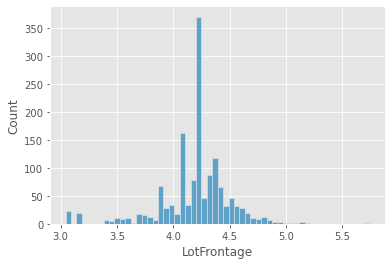

Skewness is -0.1379938086958118
Kurtosis is 4.713358369108622


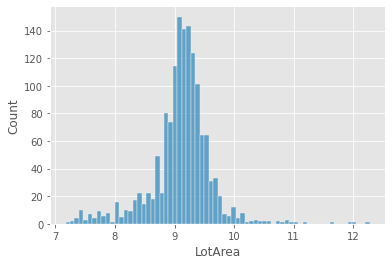

Skewness is 0.07915695223960692
Kurtosis is 0.15080801512274444


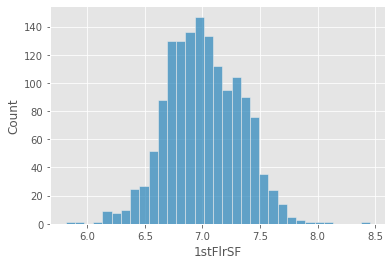

Skewness is -0.006995182187690808
Kurtosis is 0.28260268850118564


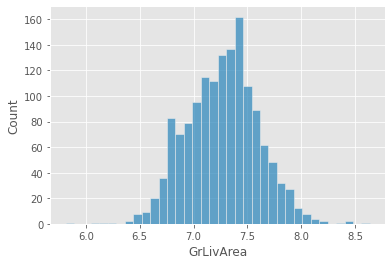

Skewness is 0.12133506220520406
Kurtosis is 0.8095319958036296


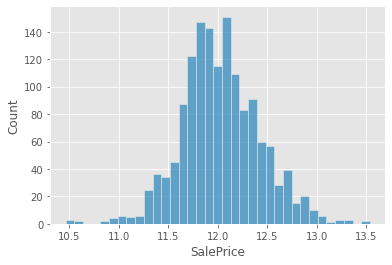

In [72]:
for feature in continuous_data_feature:
    if ((df_temp[feature].unique() <= 0).any()):
        pass
    else:
        print('Skewness is {}'.format(np.log(df_temp[feature]).skew()))
        print('Kurtosis is {}'.format(np.log(df_temp[feature]).kurtosis()))
        sns.histplot(np.log(df_temp[feature]))
        plt.show()

# Here we hare not applying log tranformation on LotFrontage, as they have Leptokurtic distribution

In [73]:
#In this code we have only selected those variable which does not have 0.
count = 0  
for feature in continuous_data_feature:
    if ((df_temp[feature].unique() <= 0).any()) or feature in ['LotFrontage']:
        count +=1
    else:
        df_temp[feature] = np.log(df_temp[feature])    
print('\nTotal discarded features: {}'.format(count))        


Total discarded features: 12


Skewness is -0.1379938086958118
Kurtosis is 4.713358369108622


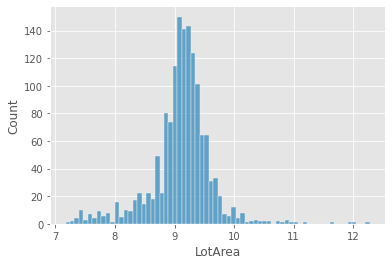

Skewness is 0.07915695223960692
Kurtosis is 0.15080801512274444


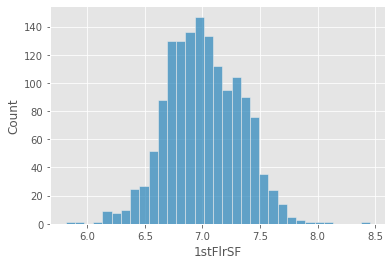

Skewness is -0.006995182187690808
Kurtosis is 0.28260268850118564


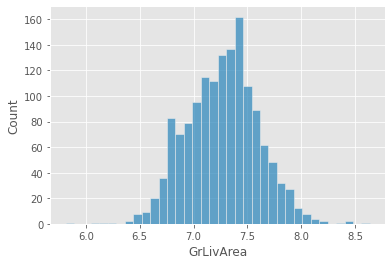

Skewness is 0.12133506220520406
Kurtosis is 0.8095319958036296


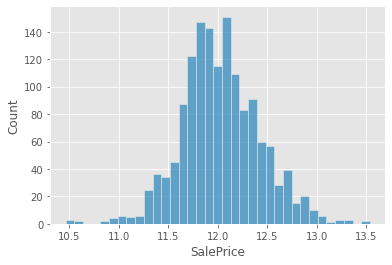

In [78]:
for feature in continuous_data_feature:
    if ((df_temp[feature].unique() <= 0).any()) or feature in ['LotFrontage']:
        pass
    else:
        print('Skewness is {}'.format(df_temp[feature].skew()))
        print('Kurtosis is {}'.format(df_temp[feature].kurtosis()))
        sns.histplot(df_temp[feature])
        plt.show()

In [79]:
df_temp[['LotArea','1stFlrSF','GrLivArea', 'SalePrice']].head()   

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,9.041922,6.752270,7.444249,12.247694
1,9.169518,7.140453,7.140453,12.109011
2,9.328123,6.824374,7.487734,12.317167
3,9.164296,6.867974,7.448334,11.849398
4,9.565214,7.043160,7.695303,12.429216


In [80]:
df_temp['LotFrontage'] = np.cbrt(df_temp['LotFrontage'])
print('Skewness',(np.cbrt(df_temp['LotFrontage']).skew()))
print('Kurtosis',(np.cbrt(df_temp['LotFrontage']).kurtosis()))

Skewness -0.8244756743518059
Kurtosis 3.500627236650208


Skewness of MasVnrArea is 1.0483883899976565
Kurtosis of MasVnrArea is 0.046612516053794906



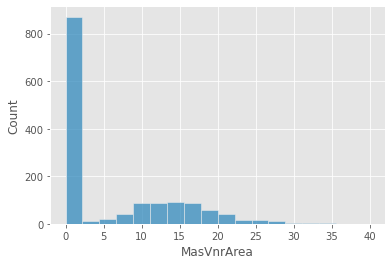

Skewness of BsmtFinSF1 is -0.02994605300118736
Kurtosis of BsmtFinSF1 is -1.159180942844442



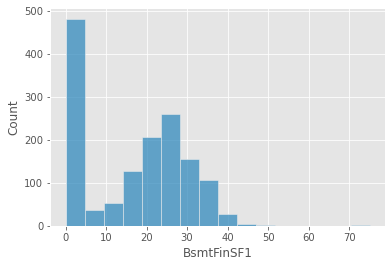

Skewness of BsmtFinSF2 is 3.0368100092936388
Kurtosis of BsmtFinSF2 is 8.363413006142771



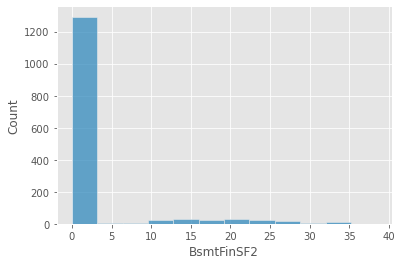

Skewness of BsmtUnfSF is -0.24650610641958765
Kurtosis of BsmtUnfSF is -0.2744798361190752



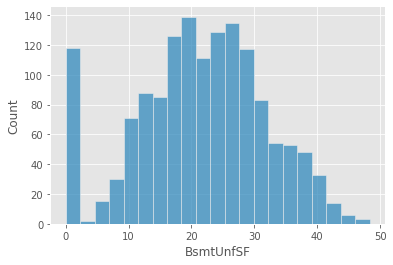

Skewness of TotalBsmtSF is -1.2745373951324759
Kurtosis of TotalBsmtSF is 6.322157960199549



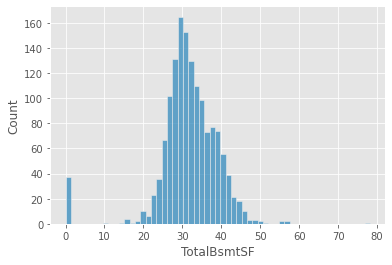

Skewness of 2ndFlrSF is 0.42233238629172287
Kurtosis of 2ndFlrSF is -1.6332271843568718



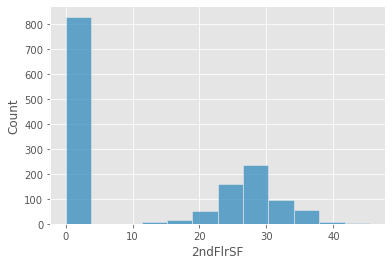

Skewness of WoodDeckSF is 0.4865737490926002
Kurtosis of WoodDeckSF is -1.2139495725020095



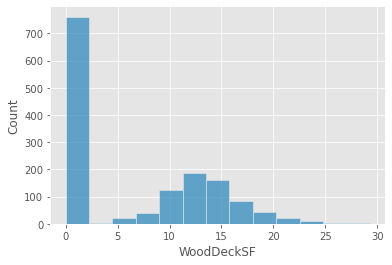

Skewness of OpenPorchSF is 0.6008842348750356
Kurtosis of OpenPorchSF is -0.5274884723654796



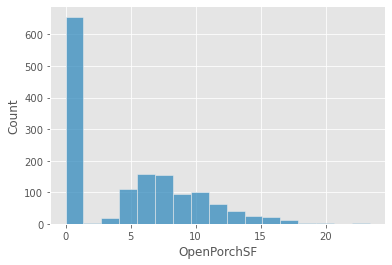

Skewness of EnclosedPorch is 2.347774888861342
Kurtosis of EnclosedPorch is 4.033974785198735



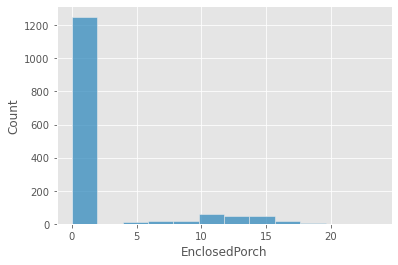

Skewness of ScreenPorch is 3.35478002029946
Kurtosis of ScreenPorch is 9.907305744104322



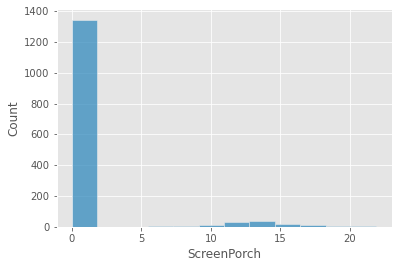

In [81]:
for feature in continuous_data_feature:
    if ((df_temp[feature].unique() <= 0).any()) and feature not in ['GarageArea']:
        df_temp[feature] = np.sqrt(df_temp[feature])
        print('Skewness of {} is {}'.format(feature, df_temp[feature].skew()))
        print('Kurtosis of {} is {}\n'.format(feature, df_temp[feature].kurtosis()))
        sns.histplot(df_temp[feature])
        plt.show()
    else:
        pass   

# Need to handle BsmtFinSF2, TotalBsmtSF, EnclosedPorch, ScreenPorch

for feature in continuous_variable:
    if 0 in df_temp[feature].unique() and feature not in ['TotalBsmtSF', 'GarageArea']:
        sns.histplot(np.sqrt(df_temp[feature]))
        print('Skewness is {}'.format(np.sqrt(df_temp[feature]).skew()))
        plt.show()
    else:
        pass  

# Categorical Features

In [82]:
df_CF = df_temp.copy()

In [83]:
len(categorical_features)

39

In [84]:
for feature in categorical_features:
    temp = df_CF[feature].value_counts()/(df_CF[feature].shape[0])*100
    temp_df = temp[temp<1].index
    data[feature] = np.where(df_CF[feature].isin(temp_df), 'Rare_var', df_CF[feature])   

In [85]:
for feature in categorical_features:
    print('Total categories in {} are : {}'.format(feature,df_CF[feature].nunique()))

Total categories in MSZoning are : 5
Total categories in Street are : 2
Total categories in LotShape are : 4
Total categories in LandContour are : 4
Total categories in Utilities are : 2
Total categories in LotConfig are : 5
Total categories in LandSlope are : 3
Total categories in Neighborhood are : 25
Total categories in Condition1 are : 9
Total categories in Condition2 are : 8
Total categories in BldgType are : 5
Total categories in HouseStyle are : 8
Total categories in RoofStyle are : 6
Total categories in RoofMatl are : 8
Total categories in Exterior1st are : 15
Total categories in Exterior2nd are : 16
Total categories in MasVnrType are : 4
Total categories in ExterQual are : 4
Total categories in ExterCond are : 5
Total categories in Foundation are : 6
Total categories in BsmtQual are : 5
Total categories in BsmtCond are : 5
Total categories in BsmtExposure are : 5
Total categories in BsmtFinType1 are : 7
Total categories in BsmtFinType2 are : 7
Total categories in Heating are :

In [86]:
df_CF[categorical_features].shape

(1460, 39)

In [87]:
df_CF.shape

(1460, 77)

In [88]:
for feature in categorical_features:
    print(df_CF.groupby(feature)['SalePrice'].mean().sort_values(), '\n')

MSZoning
C (all)    11.118259
RM         11.692893
RH         11.749840
RL         12.085885
FV         12.246616
Name: SalePrice, dtype: float64 

Street
Grvl    11.667435
Pave    12.025522
Name: SalePrice, dtype: float64 

LotShape
Reg    11.936094
IR1    12.163465
IR3    12.205413
IR2    12.318450
Name: SalePrice, dtype: float64 

LandContour
Bnk    11.810740
Lvl    12.022694
Low    12.120086
HLS    12.259257
Name: SalePrice, dtype: float64 

Utilities
NoSeWa    11.831379
AllPub    12.024183
Name: SalePrice, dtype: float64 

LotConfig
Inside     12.001900
Corner     12.027446
FR2        12.034741
FR3        12.195684
CulDSac    12.249810
Name: SalePrice, dtype: float64 

LandSlope
Gtl    12.020565
Mod    12.076866
Sev    12.130561
Name: SalePrice, dtype: float64 

Neighborhood
IDOTRR     11.446889
MeadowV    11.474522
BrDale     11.547864
BrkSide    11.679727
OldTown    11.703865
Edwards    11.712312
Sawyer     11.811468
Blueste    11.826536
SWISU      11.838435
NPkVill    11.866477

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
le = LabelEncoder()

In [91]:
for feature in categorical_features:
    df_CF[feature] = le.fit_transform(df_CF[feature])
    

In [92]:
df_CF[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,0,5,1,1,12,13,2,3,4,2,2,4,3,6,6,1,0,1,4,3,6,5,1,2,5,5,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,0,2,1,1,9,10,3,3,4,1,2,4,3,0,5,1,4,1,4,3,2,5,1,3,5,5,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,0,5,1,1,5,5,2,0,2,4,4,1,3,2,6,1,0,1,4,2,6,2,1,2,5,5,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,0,2,3,1,8,8,2,3,4,1,4,4,2,2,5,1,2,1,0,2,6,3,1,3,5,5,2,8,4


In [93]:
df_CF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,1.590138,9.041922,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,14.000000,2,4,2,2,4,3,2,26.570661,6,0.0,12.247449,29.257478,1,0,1,4,6.752270,29.223278,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,5.0,2,2,548,5,5,2,0.000000,7.810250,0.000000,0,0.0,0,0,2,2008,8,4,12.247694
1,2,20,3,1.627251,9.169518,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,2,0.000000,3,4,1,2,4,1,0,31.272992,6,0.0,16.852300,35.524639,1,0,1,4,7.140453,0.000000,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,31.0,2,2,460,5,5,2,17.262677,0.000000,0.000000,0,0.0,0,0,5,2007,8,4,12.109011
2,3,60,3,1.598130,9.328123,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,12.727922,2,4,2,2,4,2,2,22.045408,6,0.0,20.832667,30.331502,1,0,1,4,6.824374,29.427878,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,7.0,2,2,608,5,5,2,0.000000,6.480741,0.000000,0,0.0,0,0,9,2008,8,4,12.317167
3,4,70,3,1.576059,9.164296,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,13,15,2,0.000000,3,4,0,4,1,3,0,14.696938,6,0.0,23.237900,27.495454,1,2,1,4,6.867974,27.495454,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,8.0,3,3,642,5,5,2,0.000000,5.916080,16.492423,0,0.0,0,0,2,2006,8,0,11.849398
4,5,60,3,1.636096,9.565214,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,12,13,1,18.708287,2,4,2,2,4,0,2,25.592968,6,0.0,22.135944,33.837849,1,0,1,4,7.043160,32.449961,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,8.0,2,3,836,5,5,2,13.856406,9.165151,0.000000,0,0.0,0,0,12,2008,8,4,12.429216


In [94]:
null_features1 = [features for features in df_CF.columns if df_CF[features].isnull().sum() > 0]
null_features1

[]

In [95]:
final_train_data = df_CF.copy()

In [96]:
final_train_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [97]:
final_train_data.to_csv('./Cleaned data/{}'.format('Train_data.csv'), index= False)

# Feature Scaling

As I have choosed Random Forest, so i do not need to scale down any features

from sklearn.preprocessing import MinMaxScaler

scale_feature = [feature for feature in final_train_data.columns if feature not in ['Id', 'SalePrice']]

scaler = MinMaxScaler()
scaler.fit(final_train_data[scale_feature])

len(scale_feature)

scaler.transform(final_train_data[scale_feature])

scaled_data = pd.concat([final_train_data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(final_train_data[scale_feature]), columns = scale_feature)],
                    axis=1)

scaled_data.head()

Exporting Train data

scaled_data.to_csv('./Cleaned data House Price data/{}'.format('Train_data.csv'), index= False)

scaled_data.shape